Measurements 13_01_2026


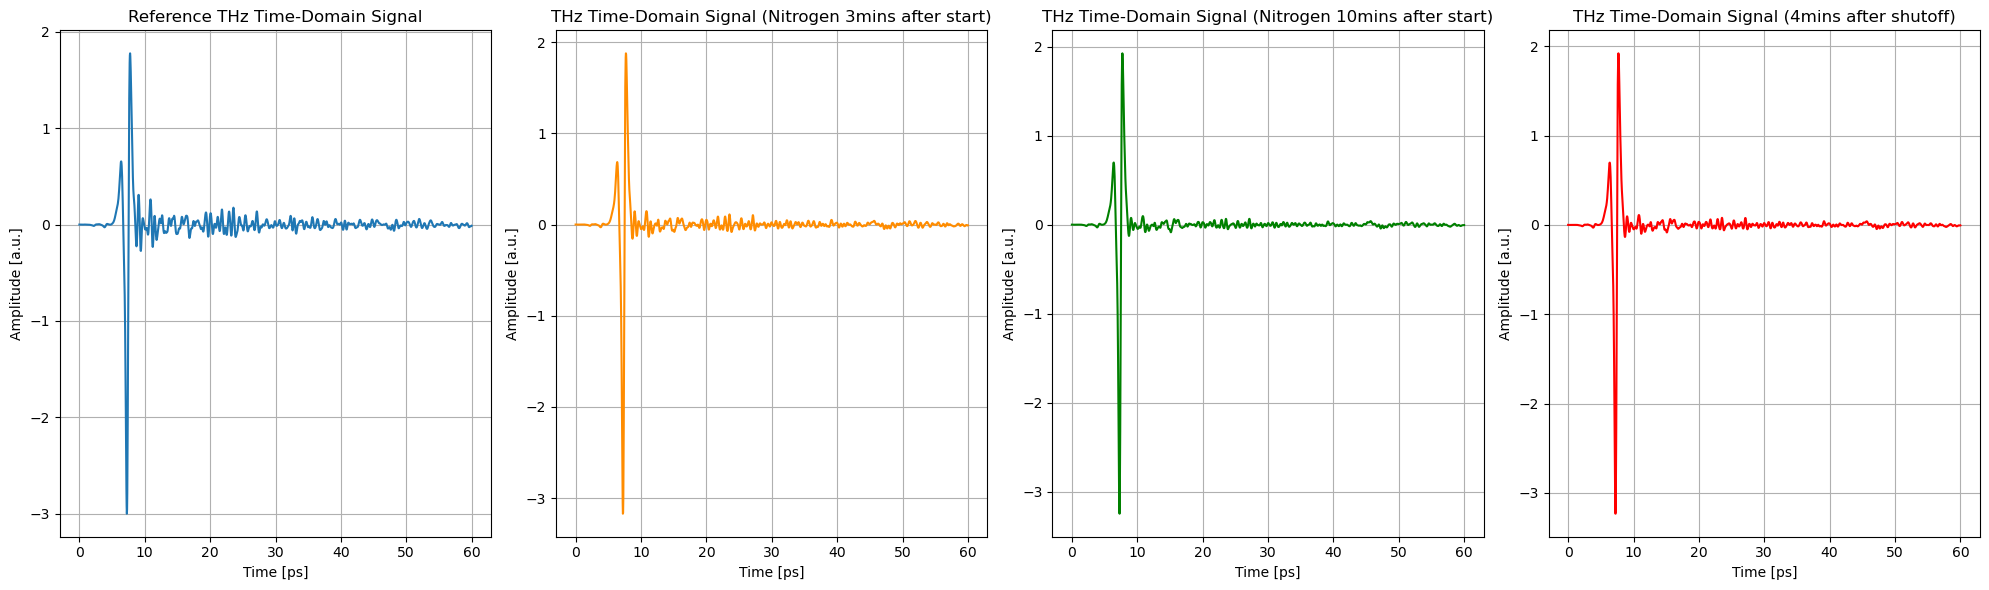

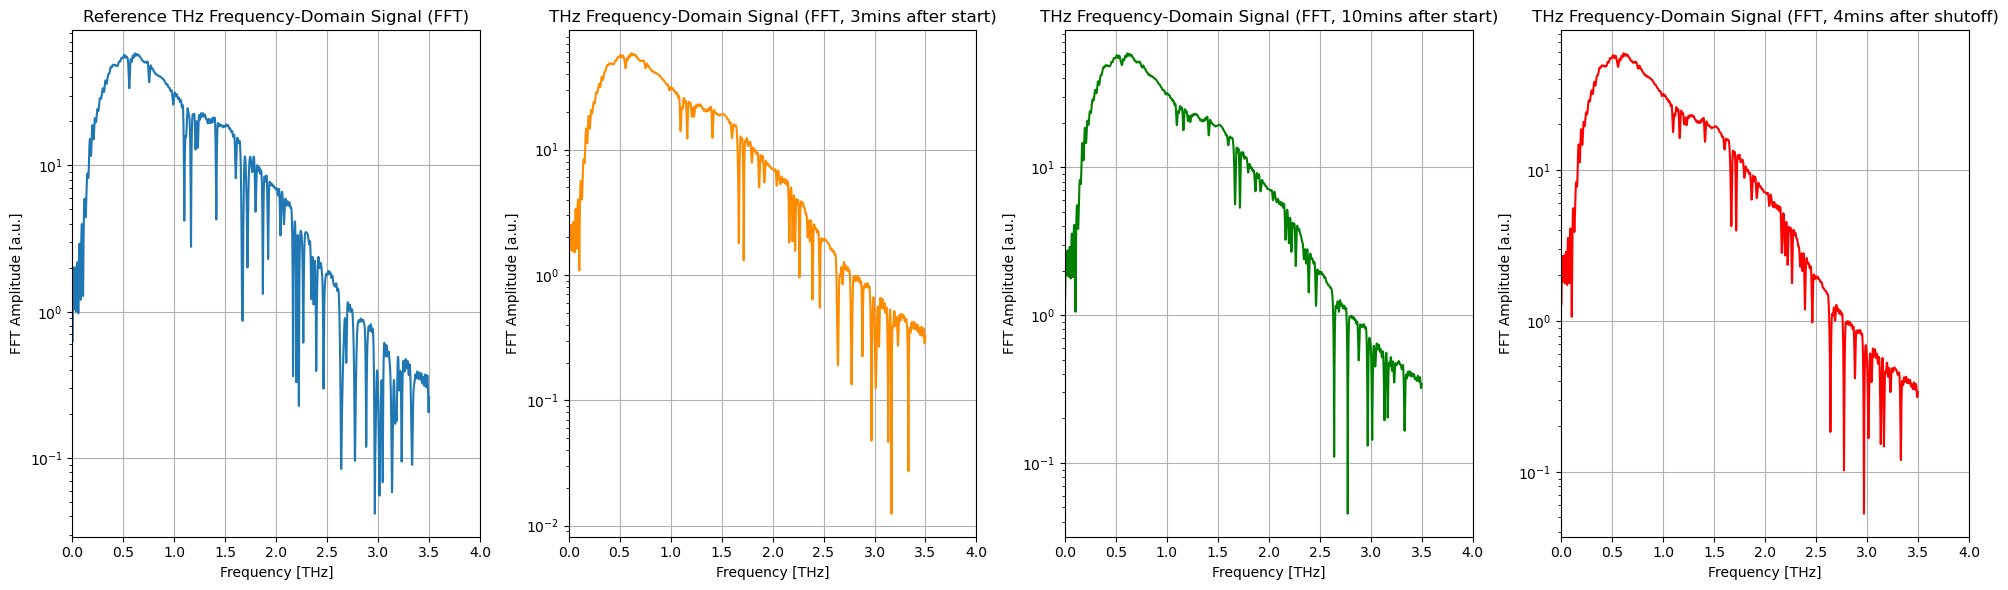

In [5]:
import numpy as np 
import matplotlib.pyplot as plt


# INSERT REFERENCE DATA 
reference_pulse = np.loadtxt(r"C:\miniconda_projects\repository\TerahertzProject\TheoTHzTDS\THz-TDS\Transfer Matrix Method\data\Test_nitrogen_start_ref.txt",dtype=float)

# INSERT NITROGEN DATA (3,10 min after start)
nitrogen_3min = np.loadtxt(r"C:\miniconda_projects\repository\TerahertzProject\TheoTHzTDS\THz-TDS\Transfer Matrix Method\data\Test_nitrogen_3min_after_start.txt",dtype=float)
nitrogen_10min = np.loadtxt(r"C:\miniconda_projects\repository\TerahertzProject\TheoTHzTDS\THz-TDS\Transfer Matrix Method\data\Test_nitrogen_10min_after_start.txt",dtype=float)

# INSERT DATA AFTER SHUTOFF (4 min after shutoff)

nitrogen_4min_after_shutoff = np.loadtxt(r"C:\miniconda_projects\repository\TerahertzProject\TheoTHzTDS\THz-TDS\Transfer Matrix Method\data\Test_nitrogen_4min_after_shutoff.txt",dtype=float)

# TIME AND AMPLITUDE ARRAYS

t1= reference_pulse[:,0] + 730  # ADJUISTING THE AXIS
amp1 = reference_pulse[:,1]
t2 = nitrogen_3min[:,0] + 730  
amp2 = nitrogen_3min[:,1]
t3 = nitrogen_10min[:,0] + 730  
amp3 = nitrogen_10min[:,1]
t4 = nitrogen_4min_after_shutoff[:,0] + 730  
amp4 = nitrogen_4min_after_shutoff[:,1]


# FFT OF SIGNALS
reference_fft = np.fft.fft(amp1,16384)
n3m_fft = np.fft.fft(amp2,16384)
n10m_fft = np.fft.fft(amp3,16384)
n4ma_fft = np.fft.fft(amp4,16384)

time_step = t1[1] - t1[0]
frequency = np.fft.fftfreq(16384, d=time_step*1e-12)  # Convert ps to s for frequency calculation


# MASKS
mask = (frequency > 0) & (frequency < 3.5 * 10**12)
reference_fft = reference_fft[mask]
n3m_fft = n3m_fft[mask]
n10m_fft = n10m_fft[mask]
n4ma_fft = n4ma_fft[mask]
frequency = frequency[mask]

# PLOTTING REFERENCE AND SAMPLE SIGNALS


# Improved PLOTS: Larger, clearer, all with grid
fig1, axs1 = plt.subplots(1, 4, figsize=(20, 6))
axs1[0].plot(t1, amp1)
axs1[0].set_xlabel('Time [ps]')
axs1[0].set_ylabel('Amplitude [a.u.]')
axs1[0].set_title('Reference THz Time-Domain Signal')
axs1[0].grid(True)
axs1[1].plot(t2, amp2, color='darkorange')
axs1[1].set_xlabel('Time [ps]')
axs1[1].set_ylabel('Amplitude [a.u.]')
axs1[1].set_title('THz Time-Domain Signal (Nitrogen 3mins after start)')
axs1[1].grid(True)
axs1[2].plot(t3, amp3, color='green')
axs1[2].set_xlabel('Time [ps]')
axs1[2].set_ylabel('Amplitude [a.u.]')
axs1[2].set_title('THz Time-Domain Signal (Nitrogen 10mins after start)')
axs1[2].grid(True)
axs1[3].plot(t4, amp4, color='red')
axs1[3].set_xlabel('Time [ps]')
axs1[3].set_ylabel('Amplitude [a.u.]')
axs1[3].set_title('THz Time-Domain Signal (4mins after shutoff)')
axs1[3].grid(True)
plt.tight_layout()
plt.show()

fig2, axs2 = plt.subplots(1, 4, figsize=(20, 6))
axs2[0].plot(frequency*1e-12, np.abs(reference_fft))
axs2[0].set_xlim(0, 4)
axs2[0].set_yscale('log')
axs2[0].set_xlabel('Frequency [THz]')
axs2[0].set_ylabel('FFT Amplitude [a.u.]')
axs2[0].set_title('Reference THz Frequency-Domain Signal (FFT)')
axs2[0].grid(True)
axs2[1].plot(frequency*1e-12, np.abs(n3m_fft), color='darkorange')
axs2[1].set_xlim(0, 4)
axs2[1].set_yscale('log')
axs2[1].set_xlabel('Frequency [THz]')
axs2[1].set_ylabel('FFT Amplitude [a.u.]')
axs2[1].set_title('THz Frequency-Domain Signal (FFT, 3mins after start)')
axs2[1].grid(True)
axs2[2].plot(frequency*1e-12, np.abs(n10m_fft), color='green')
axs2[2].set_xlim(0, 4)
axs2[2].set_yscale('log')
axs2[2].set_xlabel('Frequency [THz]')
axs2[2].set_ylabel('FFT Amplitude [a.u.]')
axs2[2].set_title('THz Frequency-Domain Signal (FFT, 10mins after start)')
axs2[2].grid(True)
axs2[3].plot(frequency*1e-12, np.abs(n4ma_fft), color='red')
axs2[3].set_xlim(0, 4)
axs2[3].set_yscale('log')
axs2[3].set_xlabel('Frequency [THz]')
axs2[3].set_ylabel('FFT Amplitude [a.u.]')
axs2[3].set_title('THz Frequency-Domain Signal (FFT, 4mins after shutoff)')
axs2[3].grid(True)
plt.tight_layout()
plt.show()
